# Modelo de Asignación Latente de Dirichlet


Elegir el conjunto de textos de su preferencia y aplicar la técnica de asignación latente de Dirichlet para modelar los tópicos.

Acá hay varias ideas para elección del conjunto de textos:

https://imerit.net/blog/17-best-text-classification-datasets-for-machine-learning-all-pbm/

In [64]:
# Importamos librerías
# Para procesar el texto
from sklearn.feature_extraction.text import CountVectorizer
# Latent Dirichlet Allocation
from sklearn.decomposition import LatentDirichletAllocation
# Para graficar
from matplotlib import pyplot as plt
import pandas as pd
import math

In [65]:
# Obtenemos datos
data_base = pd.read_csv('tweet_emotions.csv')
data = data_base["content"]
# Visualizamos datos
print(data[:5])
# ¿Cuántos documentos tenemos?
print(len(data))

0    @tiffanylue i know  i was listenin to bad habi...
1    Layin n bed with a headache  ughhhh...waitin o...
2                  Funeral ceremony...gloomy friday...
3                 wants to hang out with friends SOON!
4    @dannycastillo We want to trade with someone w...
Name: content, dtype: object
40000


In [66]:
# Definamos algunas cosas
# Número de documentos
n_docs = 40000
# Número de tópicos
n_topics = 13     #len(data_base["sentiment"].unique())
# Número de palabras en el vocabulario
n_words = 1000
# Vectorizamos el texto por medio de cuentas crudas de palabras
vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                             max_features=n_words,
                             stop_words='english')
corpus = vectorizer.fit_transform(data[:n_docs])
# Matriz de documentos vectorizados
corpus

<5000x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 21685 stored elements in Compressed Sparse Row format>

In [67]:
def plot_top_words(model, feature_names, n_top_words, title):
    # Malla para graficar 2 filas n columnas
    n = math.ceil(len(model.components_)/2)
    fig, axes = plt.subplots(2, n, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    # model.components_ hace referencia a la matriz phi
    for topic_idx, topic in enumerate(model.components_):
        # La hacemos distribución
        topic /= topic.sum()
        # Seleccionamos los índices más relevantes del tópico
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        # Obtenemos las palabras
        top_features = [feature_names[i] for i in top_features_ind]
        # Obtenemos la ponderación
        weights = topic[top_features_ind]
        
        # Graficamos barras horizontales por tópicos con las palabras más relevantes
        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

In [68]:
lda = LatentDirichletAllocation(n_components=n_topics)

In [69]:
lda.fit(corpus)

LatentDirichletAllocation(n_components=13)

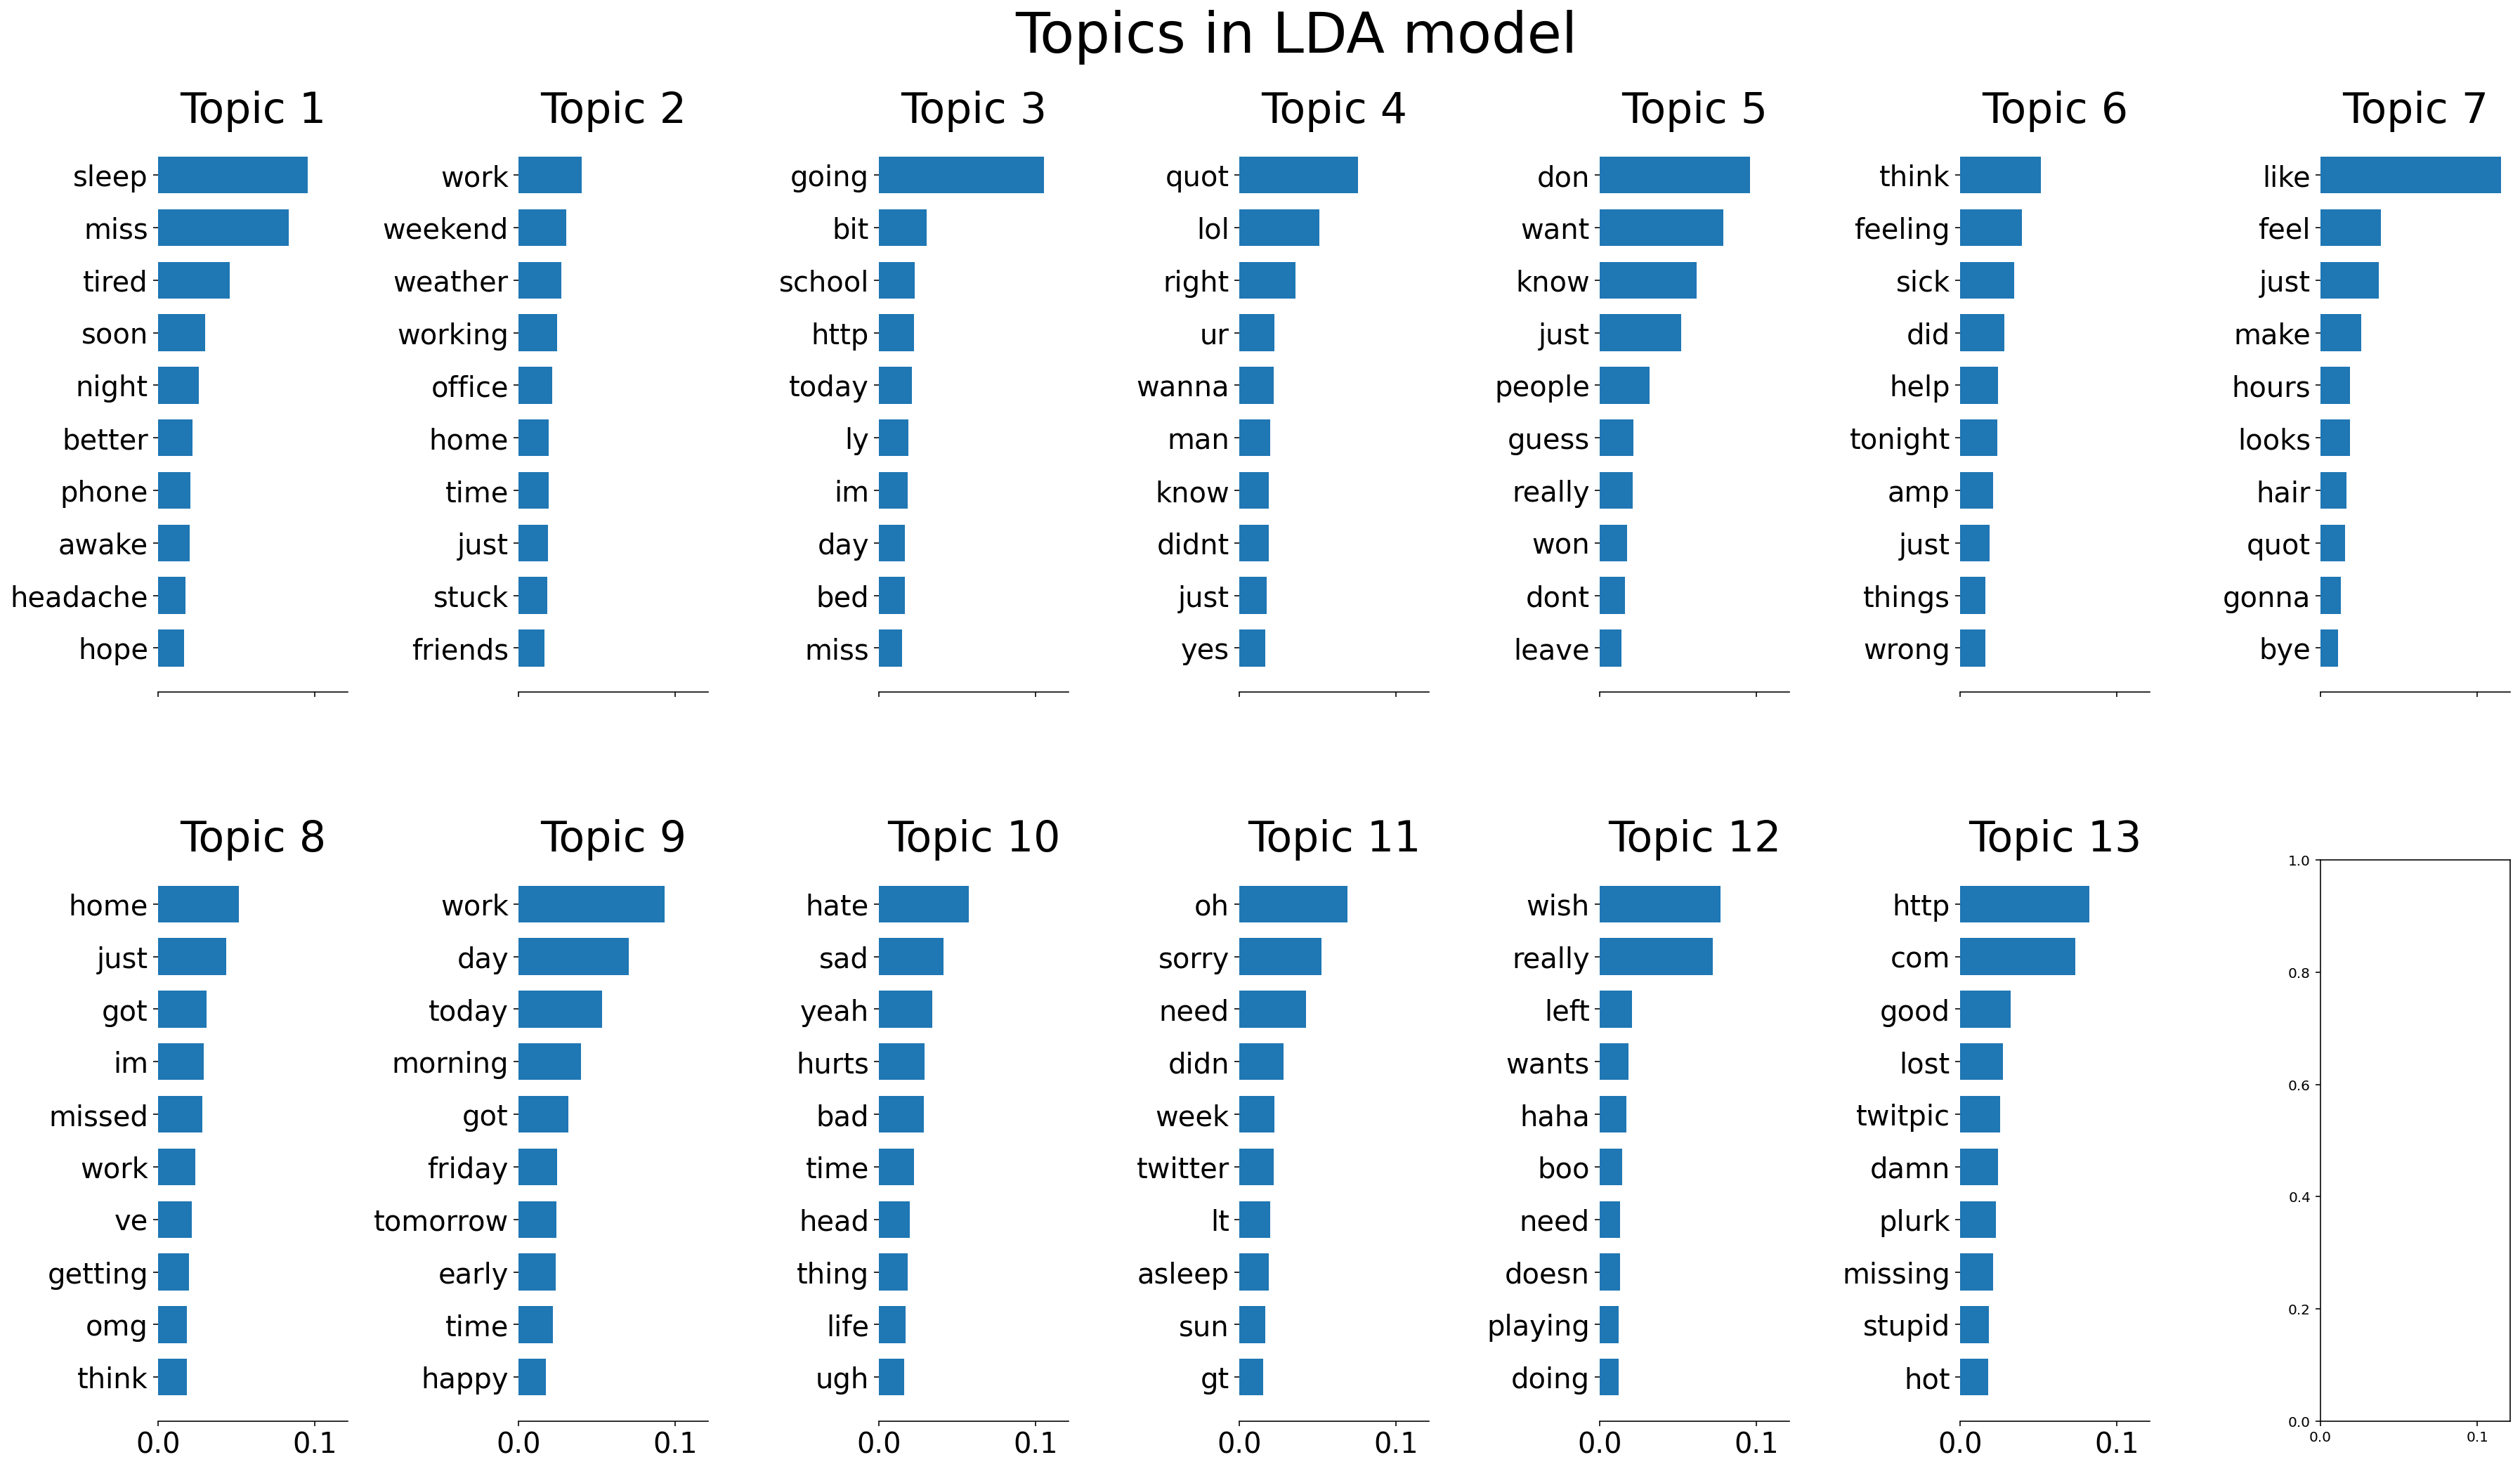

In [70]:
plot_top_words(lda, vectorizer.get_feature_names(), 10, 'Topics in LDA model')

In [71]:
print(data[0])
lda.transform(corpus[0])

@tiffanylue i know  i was listenin to bad habit earlier and i started freakin at his part =[


array([[0.01282061, 0.01282055, 0.01282064, 0.0128206 , 0.21082723,
        0.01282052, 0.30216653, 0.01282062, 0.01282061, 0.19213372,
        0.0128207 , 0.17948709, 0.01282058]])

In [72]:
print(data[101])
lda.transform(corpus[101])

@mrgenius23 You win ... SIGH Rakeem


array([[0.69230429, 0.02564103, 0.02564113, 0.02564103, 0.02564113,
        0.0256413 , 0.02564139, 0.02564103, 0.02564103, 0.02564103,
        0.02564109, 0.02564352, 0.02564103]])

In [73]:
print(data[251])
lda.transform(corpus[251])

I looove guitars, and playing them. I think they sound magnificent. If only i was better... If only


array([[0.21538425, 0.01538462, 0.01538466, 0.01538473, 0.01538462,
        0.21538433, 0.01538473, 0.01538478, 0.01538465, 0.01538467,
        0.01538474, 0.41538459, 0.01538464]])

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>